In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Description of the dataset

**Source of dataset:** https://www.kaggle.com/datasets/zynicide/wine-reviews

**Number of observations**

**Number of variables per observation**



In [3]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
52028,52028,Italy,"This shows a bright quality of fruit, with fin...",Sallier de la Tour,86,13.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Tasca d'Almerita 2010 Sallier de la Tour Nero ...,Nero d'Avola,Tasca d'Almerita
41043,41043,Italy,Aromas of pressed white flower and orchard fru...,Il Rintocco,89,26.0,Lombardy,Lugana,NaN,Kerin O’Keefe,@kerinokeefe,Marangona 2011 Il Rintocco (Lugana),Turbiana,Marangona
60754,60754,Italy,Talenti's Rosso is an impressive expression of...,NaN,89,NaN,Tuscany,Rosso di Montalcino,NaN,NaN,NaN,Talenti 2010 Rosso di Montalcino,Sangiovese Grosso,Talenti
41300,41300,South Africa,Soft animal notes are countered by ripe red fr...,NaN,86,21.0,Elgin,NaN,NaN,Lauren Buzzeo,@laurbuzz,Elgin Vintners 2008 Pinot Noir (Elgin),Pinot Noir,Elgin Vintners
101690,101690,Portugal,"Big, chunky and ripe, with earthy aromas follo...",NaN,87,18.0,Alentejano,NaN,NaN,Roger Voss,@vossroger,Monte da Ravasqueira 2008 Red (Alentejano),Portuguese Red,Monte da Ravasqueira


**Meaning and type of the different variables**

In [4]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

# Data Cleaning

The column "Unnamed: 0" is useless because count the number of the row 

Also 'taster_name' and 'taster_twitter_handle' are useless for us

In [5]:
df.drop(columns=['Unnamed: 0', 'taster_name', 'taster_twitter_handle'], inplace=True)

In [6]:
for column in df.columns:
    nan_count = df[column].isna().sum()
    unique_count = df[column].nunique()
    print(f"Column '{column}':")
    print(f"  Missing values: {nan_count}")
    print(f"  Unique values: {unique_count}")
    print()

Column 'country':
  Missing values: 63
  Unique values: 43

Column 'description':
  Missing values: 0
  Unique values: 119955

Column 'designation':
  Missing values: 37465
  Unique values: 37979

Column 'points':
  Missing values: 0
  Unique values: 21

Column 'price':
  Missing values: 8996
  Unique values: 390

Column 'province':
  Missing values: 63
  Unique values: 425

Column 'region_1':
  Missing values: 21247
  Unique values: 1229

Column 'region_2':
  Missing values: 79460
  Unique values: 17

Column 'title':
  Missing values: 0
  Unique values: 118840

Column 'variety':
  Missing values: 1
  Unique values: 707

Column 'winery':
  Missing values: 0
  Unique values: 16757



### Country column analysis

In [7]:
# Filter the DataFrame to show only rows where the specified column has NaN values
rows_with_nan = df[df['country'].isna()]
rows_with_nan

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...
124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


We have no knowledge of the country or the province or the region, so we have no idea of the origin of this wine.

### Drop duplicates

In total there are 129971 wine and is strange that the column "description" has 0 Missing values and 119955 Unique values

In [8]:
total_entries = df['description'].shape[0]
unique_entries = df['description'].nunique()

# Calculate the number of duplicate entries
duplicate_entries = total_entries - unique_entries

print(f"Number of duplicate entries in '{'description'}': {duplicate_entries}")

Number of duplicate entries in 'description': 10016


In [9]:
duplicated = df.duplicated().sum()
print(f"Total duplicate: {duplicated}")
df.drop_duplicates(inplace=True)

Total duplicate: 9983


In [10]:
total_entries = df['description'].shape[0]
unique_entries = df['description'].nunique()

# Calculate the number of duplicate entries
duplicate_entries = total_entries - unique_entries

print(f"Number of duplicate entries in '{'description'}': {duplicate_entries}")

Number of duplicate entries in 'description': 33


### Handle NaN

We want to replace NaN value with 0 in the Price column

In [11]:
nan_count = df['price'].isna().sum()
print("Before:")
print(f"total NaN in price: {nan_count}")
df['price'] = df['price'].fillna(0).astype('float64')
nan_count = df['price'].isna().sum()
print("After:")
print(f"total NaN in price: {nan_count}")

Before:
total NaN in price: 8395
After:
total NaN in price: 0


# Preprocessing

with this dataset is interesting create new columns, like price category and wine vintage

## Price Category column


at first we plot the histogram of the price to have a global idea

c:\Users\nicol\anaconda3\envs\dc24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


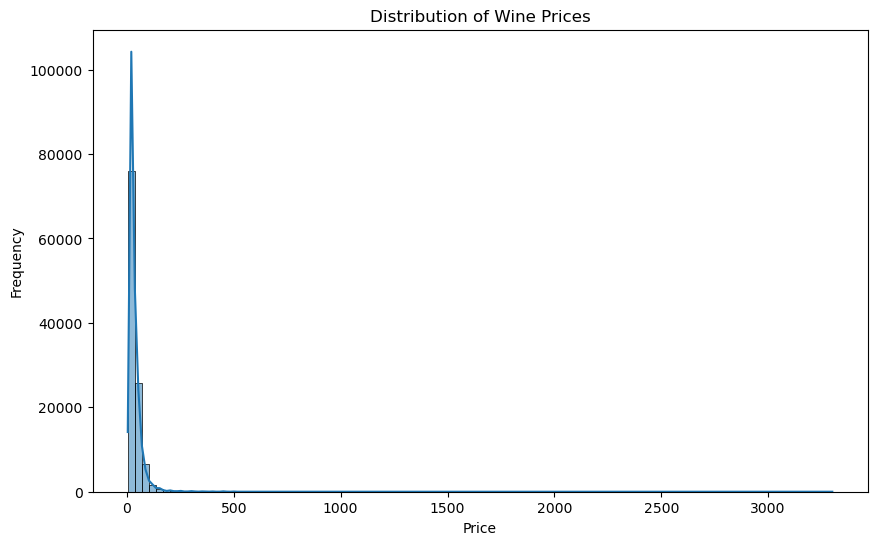

In [12]:
# Create a filtered DataFrame excluding rows where 'price' is 0 for the histogram
df_non_zero_price = df[df['price'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(df_non_zero_price['price'], bins=100, kde=True)
plt.title('histogram of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

0.33      20.0
0.66      35.0
1.00    3300.0
Name: price, dtype: float64
Low Price Range: 4.0 to 20.0
Medium Price Range: 20.0 to 35.0
High Price Range: 35.0 to 3300.0
   price price_category
1   15.0            Low
2   14.0            Low
3   13.0            Low
4   65.0           High
5   15.0            Low


C:\Users\nicol\AppData\Local\Temp\ipykernel_29664\2043304545.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_price['price_category'] = df_non_zero_price['price'].apply(categorize_price)


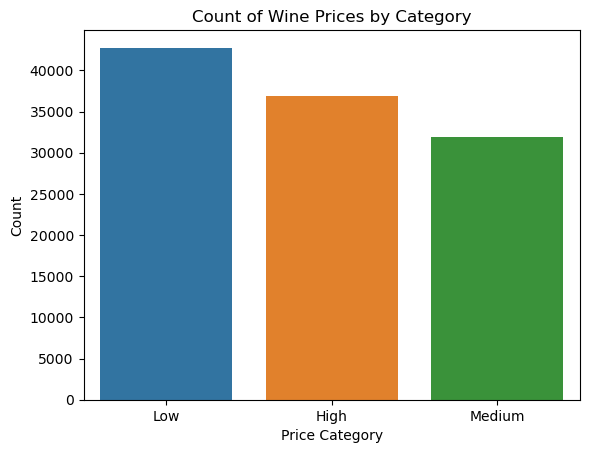

In [13]:

# Calculate quantiles
price_percentiles = df_non_zero_price['price'].quantile([0.33, 0.66, 1.0])
print(price_percentiles)

# Print the bounds for each category
low_bound = (df_non_zero_price['price'].min(), price_percentiles[0.33])
medium_bound = (price_percentiles[0.33], price_percentiles[0.66])
high_bound = (price_percentiles[0.66], df_non_zero_price['price'].max())

print(f"Low Price Range: {low_bound[0]} to {low_bound[1]}")
print(f"Medium Price Range: {medium_bound[0]} to {medium_bound[1]}")
print(f"High Price Range: {high_bound[0]} to {high_bound[1]}")

# Define categories based on the percentiles
def categorize_price(price):
    if price <= price_percentiles[0.33]:
        return 'Low'
    elif price <= price_percentiles[0.66]:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df_non_zero_price['price_category'] = df_non_zero_price['price'].apply(categorize_price)

# Check the new column
print(df_non_zero_price[['price', 'price_category']].head())

# Visualize the categorized data
sns.countplot(data=df_non_zero_price, x='price_category')
plt.title('Count of Wine Prices by Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

## Wine Vintage column

In [14]:
import re
# Function to extract the vintage year from the title or description
def extract_vintage(row):
    # Try to find the year in the title first
    title_match = re.search(r'\b(19|20)\d{2}\b', row['title'])
    if title_match:
        return int(title_match.group(0))
    # If not found in title, try to find the year in the description
    description_match = re.search(r'\b(19|20)\d{2}\b', row['description'])
    if description_match:
        return int(description_match.group(0))
    # If not found in either, return None
    return None

# Apply the function to the dataframe to create the vintage column
df['vintage'] = df.apply(extract_vintage, axis=1)

nan_counts = df.isna().sum()
nan_counts
print("Number of NaN: ", nan_count)

# Converting the vintage column to integer type to remove the .0
df['vintage'] = df['vintage'].astype('Int64')

#new column check
df[['title', 'description', 'vintage']].head()


Number of NaN:  0


,title,description,vintage
0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",2013
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",2011
2,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",2013
3,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",2013
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",2012
